In [1]:
import ROOT
import numpy as np
import pandas as pd
import os
import math

Welcome to JupyROOT 6.19/01


In [2]:
csvrdf = ROOT.ROOT.RDF.MakeCsvDataFrame

histos = [
    csvrdf("skim-time/"+filename).Histo2D((filename,filename, 1, 0, 20, 5, 0, 150), "rdfentry_", "Time")
    for filename in os.listdir("skim-time")
    if "higgstautau_skim_pyrdf_spark_Run2012C_TauPlusX" in filename
]

means = [
    csvrdf("skim-time/"+filename).Mean("Time")
    for filename in os.listdir("skim-time")
    if "higgstautau_skim_pyrdf_spark_Run2012C_TauPlusX" in filename
]


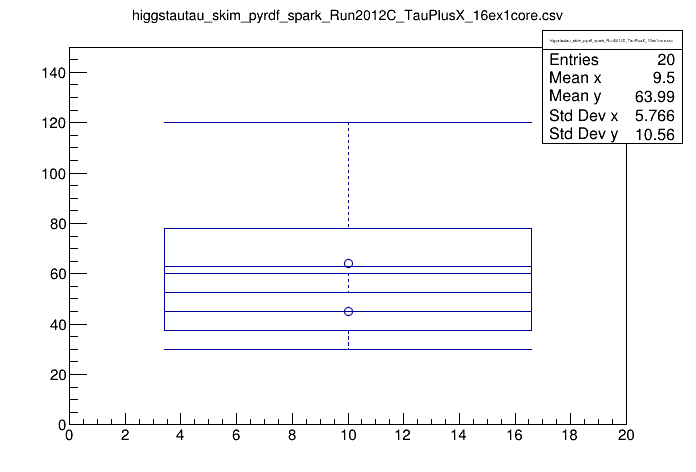

In [53]:
c = ROOT.TCanvas()
h1 = histos[0].GetValue()
h1.Draw("CANDLE")
h2 = histos[1].GetValue()
h2.SetAxisRange(0,10,"X")
h2.Draw("CANDLE SAME")


c.Draw()

In [21]:
means[0].GetValue()

63.98572015762329

In [55]:
rdf_8ex1core = csvrdf("skim-time/higgstautau_skim_pyrdf_spark_8ex1core.csv")
rdf_8ex1core.Mean("Time").GetValue(), rdf_8ex1core.StdDev("Time").GetValue()

(598.6183171593226, 34.01715921159623)

In [59]:
rdf_cpp = csvrdf("skim-time/higgstautau_cpp_multithreaded.csv")
rdf_cpp.Mean("Time").GetValue(), rdf_cpp.StdDev("Time").GetValue()

(762.6695769230771, 121.23782242161002)

In [57]:
rdf_4ex1core = csvrdf("skim-time/higgstautau_skim_pyrdf_spark_4ex1core.csv")
rdf_4ex1core.Mean("Time").GetValue(), rdf_4ex1core.StdDev("Time").GetValue()

(782.2677127838135, 102.58999287459119)

In [11]:
skim_comp_names = [
    "skim-time/higgstautau_cpp_multithreaded.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_4ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_8ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_16ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_repartition16_16ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_repartition32_32ex1core.csv",
]
skim_comp_cores = [1, 2, 3, 4, 5, 6]
skim_comp_means_seconds = [pd.read_csv(filename).Time.mean() for filename in skim_comp_names]
skim_comp_means_minutes = [time/60 for time in skim_comp_means_seconds]
skim_comp_std = [pd.read_csv(filename).Time.std()/60 for filename in skim_comp_names]
skim_comp_ci = [std/math.sqrt(20) for std in skim_comp_std]

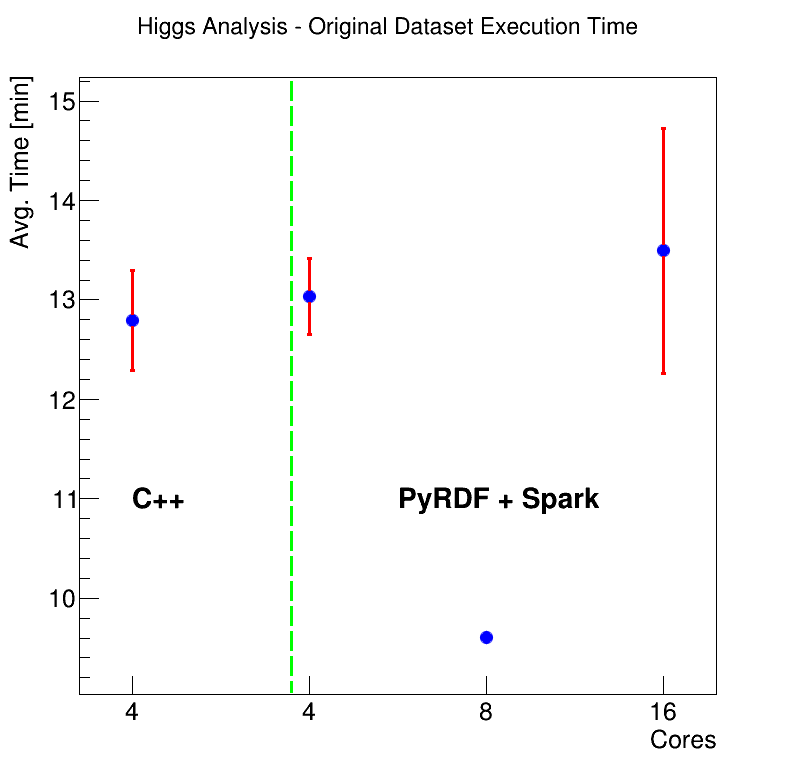

In [13]:
c = ROOT.TCanvas("","",0,0,800,800)
graph = ROOT.TGraphErrors()
for i in range(4):
    graph.SetPoint(i, skim_comp_cores[i], skim_comp_means_minutes[i])
    graph.SetPointError(i, 0, skim_comp_ci[i])
graph.SetMarkerColor(4)
graph.SetMarkerStyle(20)
graph.SetMarkerSize(1.5)
graph.SetLineColorAlpha(ROOT.kRed,1)
graph.SetLineWidth(3)
graph.SetTitle("Higgs Analysis - Original Dataset Execution Time")

graph.GetXaxis().SetNdivisions(4,0,0)
graph.GetXaxis().ChangeLabel(1,-1,-1,-1,-1,-1,"4")
graph.GetXaxis().ChangeLabel(2,-1,-1,-1,-1,-1,"4")
graph.GetXaxis().ChangeLabel(3,-1,-1,-1,-1,-1,"8")
graph.GetXaxis().ChangeLabel(4,-1,-1,-1,-1,-1,"16")
graph.GetXaxis().SetTitle("Cores")
graph.GetYaxis().SetTitle("Avg. Time [min]")
graph.GetYaxis().SetTitleOffset(1.3)
graph.Draw("AP")

sepline = ROOT.TLine(1.9, 9.05, 1.9, 15.2)
sepline.SetLineColor(ROOT.kGreen)
sepline.SetLineStyle(9)
sepline.SetLineWidth(3)
sepline.Draw("same")

pt1 = ROOT.TText(1,11,"C++")
pt1.SetTextSize(0.04)
pt1.SetTextAlign(12)
pt1.Draw()

pt2 = ROOT.TText(2.5,11,"PyRDF + Spark")
pt2.SetTextSize(0.04)
pt2.SetTextAlign(12)
pt2.Draw()

c.Draw()
c.SaveAs("htt_time_original.png")

In [14]:
skim_comp_names = [
    "skim-time/higgstautau_cpp_multithreaded.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_4ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_8ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_repartition16_16ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_repartition32_32ex1core.csv",
]
skim_comp_cores = [1, 2, 3, 4, 5]
skim_comp_means_seconds = [pd.read_csv(filename).Time.mean() for filename in skim_comp_names]
skim_comp_means_minutes = [time/60 for time in skim_comp_means_seconds]
skim_comp_std = [pd.read_csv(filename).Time.std()/60 for filename in skim_comp_names]
skim_comp_ci = [std/math.sqrt(20) for std in skim_comp_std]

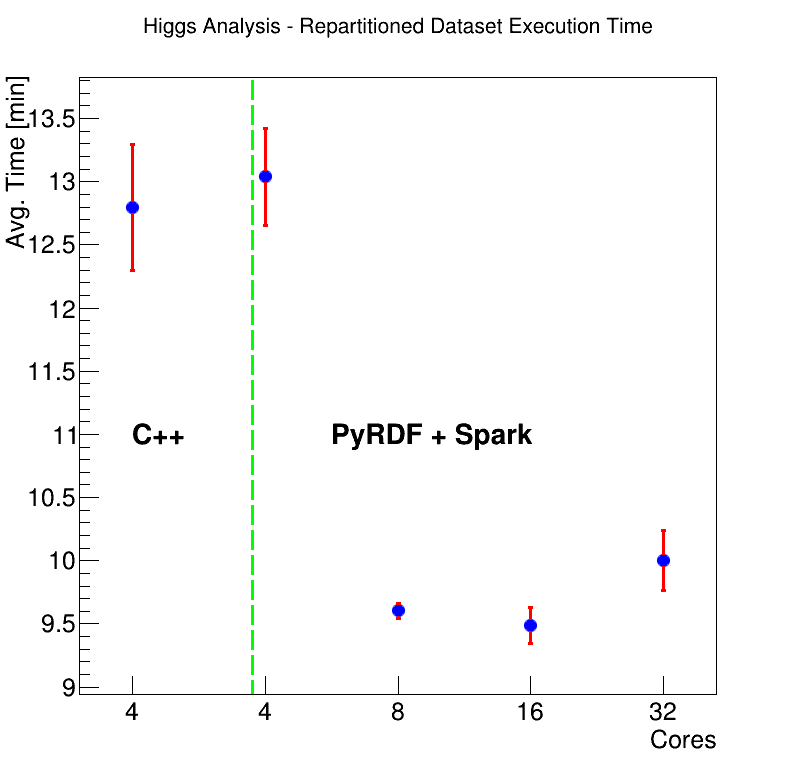

In [16]:
c = ROOT.TCanvas("","",0,0,800,800)
graph = ROOT.TGraphErrors()
for i in range(5):
    graph.SetPoint(i, skim_comp_cores[i], skim_comp_means_minutes[i])
    graph.SetPointError(i, 0, skim_comp_ci[i])

graph.SetMarkerColor(4)
graph.SetMarkerStyle(20)
graph.SetMarkerSize(1.5)
graph.SetLineColorAlpha(ROOT.kRed,1)
graph.SetLineWidth(3)
graph.SetTitle("Higgs Analysis - Repartitioned Dataset Execution Time")

graph.GetXaxis().SetNdivisions(5,0,0)
graph.GetXaxis().ChangeLabel(1,-1,-1,-1,-1,-1,"4")
graph.GetXaxis().ChangeLabel(2,-1,-1,-1,-1,-1,"4")
graph.GetXaxis().ChangeLabel(3,-1,-1,-1,-1,-1,"8")
graph.GetXaxis().ChangeLabel(4,-1,-1,-1,-1,-1,"16")
graph.GetXaxis().ChangeLabel(5,-1,-1,-1,-1,-1,"32")

graph.GetXaxis().SetTitle("Cores")
graph.GetYaxis().SetTitle("Avg. Time [min]")
graph.GetYaxis().SetTitleOffset(1.4)
graph.Draw("AP")

sepline = ROOT.TLine(1.9, 8.95, 1.9, 13.8)
sepline.SetLineColor(ROOT.kGreen)
sepline.SetLineStyle(9)
sepline.SetLineWidth(3)
sepline.Draw("same")

pt1 = ROOT.TText(1,11,"C++")
pt1.SetTextSize(0.04)
pt1.SetTextAlign(12)
pt1.Draw()

pt2 = ROOT.TText(2.5,11,"PyRDF + Spark")
pt2.SetTextSize(0.04)
pt2.SetTextAlign(12)
pt2.Draw()

c.Draw()
c.SaveAs("htt_time_repartitioned.png")

In [6]:
skim_comp_names = [
    "skim-time/higgstautau_skim_pyrdf_spark_Run2012C_TauPlusX_1ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_Run2012C_TauPlusX_4ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_Run2012C_TauPlusX_8ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_Run2012C_TauPlusX_16ex1core.csv",
    "skim-time/higgstautau_skim_pyrdf_spark_Run2012C_TauPlusX_32ex1core.csv",
]
skim_comp_cores = [1, 4, 8, 16, 32]
skim_comp_means_seconds = [pd.read_csv(filename).Time.mean() for filename in skim_comp_names]
skim_comp_means_minutes = [time/60 for time in skim_comp_means_seconds]
skim_comp_std = [pd.read_csv(filename).Time.std()/60 for filename in skim_comp_names]
skim_comp_ci = [std/math.sqrt(20) for std in skim_comp_std]
skim_comp_speedup = [skim_comp_means_seconds[0]/t for t in skim_comp_means_seconds]

In [7]:
skim_comp_speedup

[1.0,
 3.240851550978377,
 5.354164879194833,
 8.287154125270169,
 11.472620244804467]

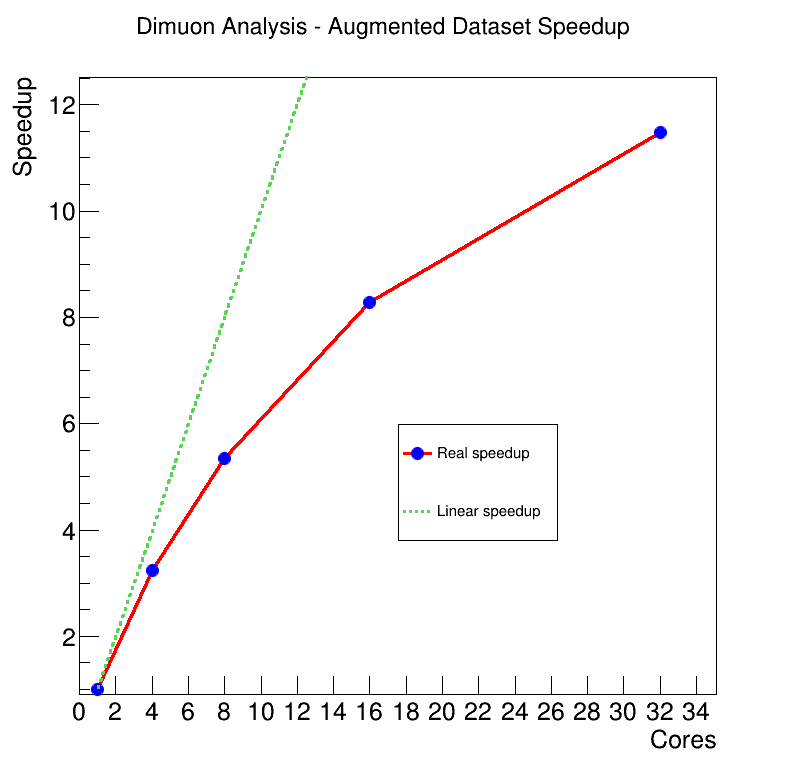

In [10]:
c = ROOT.TCanvas("","",0,0,800,800)
graph = ROOT.TGraph()
for i in range(5):
    graph.SetPoint(i, skim_comp_cores[i], skim_comp_speedup[i])
graph.SetMarkerColor(4)
graph.SetMarkerStyle(20)
graph.SetMarkerSize(1.5)
graph.SetLineColorAlpha(ROOT.kRed,1)
graph.SetLineWidth(3)
graph.SetTitle("Dimuon Analysis - Augmented Dataset Speedup ")
# graph.GetXaxis().ChangeLabel(2,-1,-1,-1,-1,-1,"-#pi")
graph.GetXaxis().SetNdivisions(32, 0, 0)
graph.GetXaxis().SetTitle("Cores")
graph.GetYaxis().SetTitle("Speedup")
graph.Draw("APL")

graphlin = ROOT.TGraph()

for i in range(4):
    graphlin.SetPoint(i, skim_comp_cores[i], skim_comp_cores[i])
graphlin.SetLineStyle(2)
graphlin.SetLineColor(8)
graphlin.SetLineWidth(3)
graphlin.Draw("SAME")

legend = ROOT.TLegend(0.5,0.3,0.7,0.45)
legend.AddEntry(graph, "Real speedup")
legend.AddEntry(graphlin, "Linear speedup", "L")
legend.Draw()

c.Draw()
c.SaveAs("htt_speedup_Run2012C_TauPlusX.png")